In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.15.0


In [4]:
## import some basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## Divide the dataset into independent and dependent features
X = dataset.drop(columns=['RowNumber','CustomerId','Surname','Exited'],axis=1)

In [13]:
y = dataset['Exited']

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [22]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [24]:
# Concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis=1)

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [27]:
X = pd.concat([X,geography,gender],axis=1)

In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
# Splitting the dataset into training and test split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
print(X.shape,X_train.shape,X_test.shape)

(10000, 11) (8000, 11) (2000, 11)


In [41]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [43]:
## Lets initialize the ANN
classifier = Sequential()

In [45]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [46]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [47]:
# Adding the second hiddern layer
classifier.add(Dense(units=6,activation='relu'))

In [48]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [53]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [59]:
## Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [60]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size= 10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.8619 - val_loss: 0.3754 - val_accuracy: 0.8512
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3154 - accuracy: 0.8630 - val_loss: 0.3908 - val_accuracy: 0.8531
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3139 - accuracy: 0.8621 - val_loss: 0.3711 - val_accuracy: 0.8512
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3150 - accuracy: 0.8617 - val_loss: 0.3917 - val_accuracy: 0.8478
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3150 - accuracy: 0.8628 - val_loss: 0.3792 - val_accuracy: 0.8523
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3152 - accuracy: 0.8634 - val_loss: 0.3661 - val_accuracy: 0.8527
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3137 - accuracy: 0.8628 - val_loss: 0.4003 - val_accuracy:

In [63]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

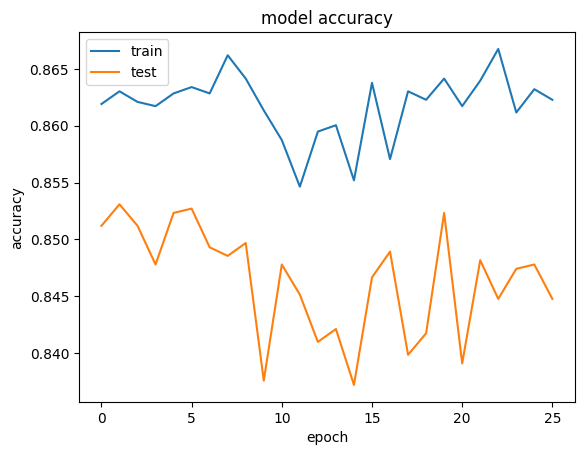

In [64]:
# Summarize histroy for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

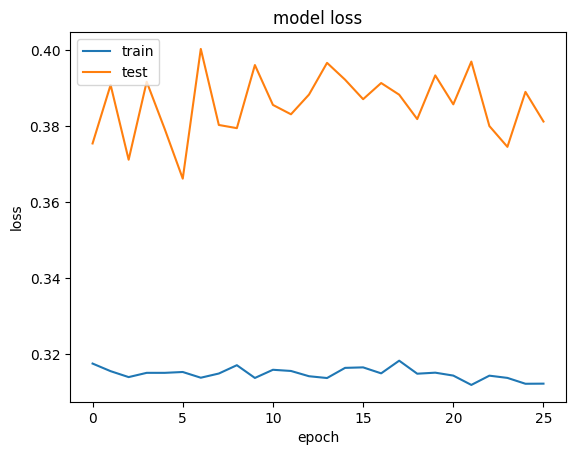

In [65]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [66]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [69]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1468,  127],
       [ 172,  233]])

In [70]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [71]:
score

0.8505

In [73]:
## get the weights
classifier.get_weights()

[array([[-1.35928833e+00, -1.64398789e+00, -1.05539799e+00,
          2.28116608e+00, -7.28881299e-01, -4.95526224e-01,
          1.75021276e-01,  2.88964033e-01,  1.43930995e+00,
         -4.17424738e-01, -4.04441915e-02],
        [-1.34502828e+00, -1.42902005e+00, -2.64899969e+00,
         -2.91329837e+00,  4.43067169e+00,  3.73696876e+00,
         -8.96358311e-01,  2.21358848e+00,  7.36330390e-01,
          1.22308385e+00, -6.06638610e-01],
        [ 1.65776336e+00,  2.45949292e+00, -2.38776296e-01,
          2.23361924e-01, -1.89851964e+00, -2.25522146e-02,
          8.94304633e-01,  2.26296276e-01,  7.22815156e-01,
          7.47475684e-01, -9.07643080e-01],
        [-2.32072973e+00, -9.09101129e-01, -1.02312326e+00,
         -1.48505807e-01,  2.69416302e-01, -3.71404886e-01,
          3.51637340e+00, -1.11304864e-01, -5.03273678e+00,
         -4.02169275e+00, -6.67077184e-01],
        [-1.98877764e+00, -2.35475495e-01, -1.94802940e-01,
         -2.50814366e+00, -1.83518791e+00, -